## Importing DataSet

In [1]:
#importing DataSet
import os
print(os.listdir('../'))
print(os.listdir('../input'))
print(os.listdir('../input/data'))
print(os.listdir('../input/data/natural_images/'))

['src', 'lib', 'input', 'working']
['data']
['natural_images']
['airplane', 'dog', 'fruit', 'cat', 'flower', 'person', 'car', 'motorbike']


## Importing Layers

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten

Using TensorFlow backend.


## Declaring variables with Values

In [3]:
batchSize = 50
epochSize = 60
#dimensions
dim1 = dim2 = 256

## Preparing Model and Adding Layers for ADAM optimizer

In [4]:
#model initializing
model = Sequential()

#adding conv2d and maxpool2d layers
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(dim1, dim2, 3)))
model.add(MaxPool2D(pool_size=(2,2)))

#2nd layer addition
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

In [5]:
#hidden layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.4))

model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.3))

model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.2))

#output
model.add(Dense(8, activation='softmax'))

In [6]:
#model compilation - ADAM
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Image Precprocessing & generation of Training and validarion sets

In [7]:
from keras.preprocessing.image import ImageDataGenerator
img_generator = ImageDataGenerator(
        validation_split=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [8]:
train_generator = img_generator.flow_from_directory(
        '../input/data/natural_images/',
        target_size=(dim1, dim2),
        batch_size=batchSize,
        subset='training'
        )

validation_generator = img_generator.flow_from_directory(
        '../input/data/natural_images/',
        target_size=(dim1, dim2),
        batch_size=batchSize,
        subset='validation'
)

Found 5522 images belonging to 8 classes.
Found 1377 images belonging to 8 classes.


## Model Fitting

In [9]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=(5522 / batchSize),
        epochs=epochSize,
        validation_data=validation_generator,
        validation_steps=(1377 / batchSize))

Epoch 1/60
111/110 [==============================] - 106s 953ms/step - loss: 1.4615 - acc: 0.4674 - val_loss: 0.7023 - val_acc: 0.7386
Epoch 2/60
111/110 [==============================] - 85s 764ms/step - loss: 0.5715 - acc: 0.7848 - val_loss: 0.4402 - val_acc: 0.8228
Epoch 3/60
111/110 [==============================] - 85s 763ms/step - loss: 0.4742 - acc: 0.8196 - val_loss: 0.4473 - val_acc: 0.8206
Epoch 4/60
111/110 [==============================] - 85s 767ms/step - loss: 0.3742 - acc: 0.8527 - val_loss: 0.4627 - val_acc: 0.8344
Epoch 5/60
111/110 [==============================] - 85s 763ms/step - loss: 0.3282 - acc: 0.8737 - val_loss: 0.3448 - val_acc: 0.8627
Epoch 6/60
111/110 [==============================] - 85s 761ms/step - loss: 0.3116 - acc: 0.8800 - val_loss: 0.3684 - val_acc: 0.8715
Epoch 7/60
111/110 [==============================] - 84s 757ms/step - loss: 0.2737 - acc: 0.8915 - val_loss: 0.3288 - val_acc: 0.8903
Epoch 8/60
111/110 [==============================] - 

In [10]:
history.history

{'val_loss': [0.7023057827675957,
  0.44024516543618303,
  0.4473112775371312,
  0.46271779992568296,
  0.34480176936394075,
  0.36835184678186433,
  0.3287662456194906,
  0.2945237018292419,
  0.29600871073524415,
  0.28176382961010016,
  0.28054655879497875,
  0.2257427384856393,
  0.242471623167493,
  0.2875208434261268,
  0.27377288370307323,
  0.2561316513114852,
  0.2496296697517366,
  0.23318368720787544,
  0.2389352623976567,
  0.20981251076134375,
  0.18723166123649393,
  0.20593754878469195,
  0.2214725449540603,
  0.235845444692852,
  0.25519593736087837,
  0.1794060069469758,
  0.21132433249431845,
  0.21178321402381967,
  0.22095341240268906,
  0.20149231360401462,
  0.1975255048872339,
  0.1745715279215994,
  0.20149319641124364,
  0.2019817113183769,
  0.21642758246421945,
  0.2335743100186925,
  0.20780836521345547,
  0.20748859744034734,
  0.2700817462005473,
  0.22483972693234142,
  0.23004508778972305,
  0.17788659059966744,
  0.2010145953429637,
  0.2125304131122737

In [11]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [12]:
adam_val_loss = history.history['val_loss']
adam_val_acc = history.history['val_acc']
adam_loss = history.history['loss']
adam_acc = history.history['acc']
adam_epochs = range(len(adam_acc))

## Visualizing

In [13]:
import matplotlib.pyplot as plt

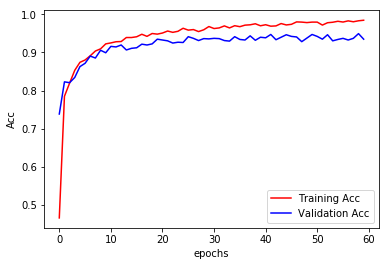

In [14]:
plt.plot(adam_epochs, adam_acc, 'red', label='Training Acc')
plt.plot(adam_epochs, adam_val_acc, 'blue', label='Validation Acc')
plt.xlabel('epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

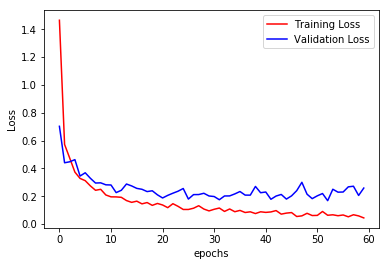

In [15]:
plt.plot(adam_epochs, adam_loss, 'red', label='Training Loss')
plt.plot(adam_epochs, adam_val_loss, 'blue', label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Model preparing for RMSprop optimizer

In [16]:
#model initializing
model = Sequential()

#adding conv2d and maxpool2d layers
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(dim1, dim2, 3)))
model.add(MaxPool2D(pool_size=(2,2)))

#2nd layer addition
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

In [17]:
#hidden layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.4))

model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.3))

model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.2))

#output
model.add(Dense(8, activation='softmax'))

In [18]:
#model compilation - RMSprop
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
RMSprop_history = model.fit_generator(
        train_generator,
        steps_per_epoch=(5522 / batchSize),
        epochs=epochSize,
        validation_data=validation_generator,
        validation_steps=(1377 / batchSize))

Epoch 1/60
111/110 [==============================] - 92s 831ms/step - loss: 1.5297 - acc: 0.5014 - val_loss: 0.7191 - val_acc: 0.7480
Epoch 2/60
111/110 [==============================] - 85s 767ms/step - loss: 0.6504 - acc: 0.7665 - val_loss: 0.7111 - val_acc: 0.7749
Epoch 3/60
111/110 [==============================] - 85s 762ms/step - loss: 0.5287 - acc: 0.8131 - val_loss: 0.4662 - val_acc: 0.8228
Epoch 4/60
111/110 [==============================] - 85s 763ms/step - loss: 0.4446 - acc: 0.8444 - val_loss: 0.3422 - val_acc: 0.8744
Epoch 5/60
111/110 [==============================] - 85s 767ms/step - loss: 0.3639 - acc: 0.8676 - val_loss: 0.3567 - val_acc: 0.8736
Epoch 6/60
111/110 [==============================] - 84s 761ms/step - loss: 0.3364 - acc: 0.8857 - val_loss: 0.5898 - val_acc: 0.8119
Epoch 7/60
111/110 [==============================] - 84s 758ms/step - loss: 0.2892 - acc: 0.8939 - val_loss: 0.3573 - val_acc: 0.8925
Epoch 8/60
111/110 [==============================] - 8

In [20]:
RMSprop_history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [21]:
RMSprop_loss = RMSprop_history.history['loss']
RMSprop_val_loss = RMSprop_history.history['val_loss']
RMSprop_acc = RMSprop_history.history['acc']
RMSprop_val_acc = RMSprop_history.history['val_acc']
RMSprop_epochs = range(len(RMSprop_acc))

## Visualizing

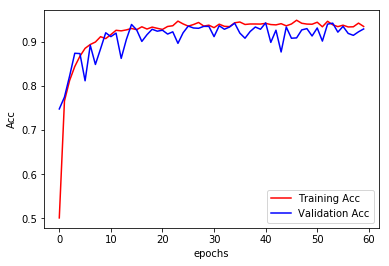

In [22]:
plt.plot(RMSprop_epochs, RMSprop_acc, 'red', label='Training Acc')
plt.plot(RMSprop_epochs, RMSprop_val_acc, 'blue', label='Validation Acc')
plt.xlabel('epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

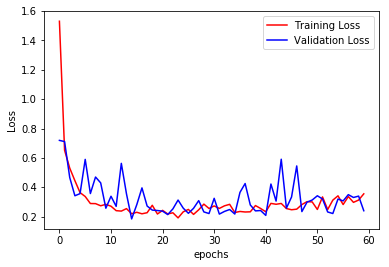

In [23]:
plt.plot(RMSprop_epochs, RMSprop_loss, 'red', label='Training Loss')
plt.plot(RMSprop_epochs, RMSprop_val_loss, 'blue', label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Model preperation for Adagrad

In [24]:
#model initializing
model = Sequential()

#adding conv2d and maxpool2d layers
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(dim1, dim2, 3)))
model.add(MaxPool2D(pool_size=(2,2)))

#2nd layer addition
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

In [25]:
#hidden layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.4))

model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.3))

model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.2))

#output
model.add(Dense(8, activation='softmax'))

In [26]:
#model compilation - Adagrad
model.compile(optimizer='Adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
Adagrad_history = model.fit_generator(
        train_generator,
        steps_per_epoch=(5522 / batchSize),
        epochs=epochSize,
        validation_data=validation_generator,
        validation_steps=(1377 / batchSize))

Epoch 1/60
111/110 [==============================] - 92s 832ms/step - loss: 13.6940 - acc: 0.1432 - val_loss: 13.8239 - val_acc: 0.1423
Epoch 2/60
111/110 [==============================] - 85s 766ms/step - loss: 13.8737 - acc: 0.1392 - val_loss: 13.8122 - val_acc: 0.1431
Epoch 3/60
111/110 [==============================] - 85s 766ms/step - loss: 13.8040 - acc: 0.1436 - val_loss: 13.8239 - val_acc: 0.1423
Epoch 4/60
111/110 [==============================] - 85s 763ms/step - loss: 13.7806 - acc: 0.1450 - val_loss: 13.8473 - val_acc: 0.1409
Epoch 5/60
111/110 [==============================] - 85s 763ms/step - loss: 13.8272 - acc: 0.1421 - val_loss: 13.8356 - val_acc: 0.1416
Epoch 6/60
111/110 [==============================] - 85s 768ms/step - loss: 13.7858 - acc: 0.1447 - val_loss: 13.7888 - val_acc: 0.1445
Epoch 7/60
111/110 [==============================] - 85s 763ms/step - loss: 13.8613 - acc: 0.1400 - val_loss: 13.8356 - val_acc: 0.1416
Epoch 8/60
111/110 [=====================

In [28]:
Adagrad_history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [29]:
Adagrad_loss = Adagrad_history.history['loss']
Adagrad_val_loss = Adagrad_history.history['val_loss']
Adagrad_acc = Adagrad_history.history['acc']
Adagrad_val_acc = Adagrad_history.history['val_acc']
Adagrad_epochs = range(len(Adagrad_acc))

## Visualizing

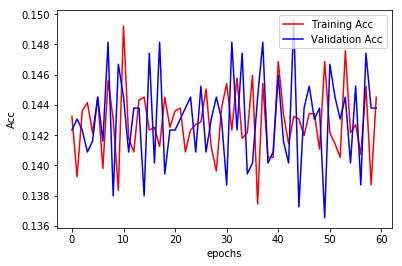

In [30]:
plt.plot(Adagrad_epochs, Adagrad_acc, 'red', label='Training Acc')
plt.plot(Adagrad_epochs, Adagrad_val_acc, 'blue', label='Validation Acc')
plt.xlabel('epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

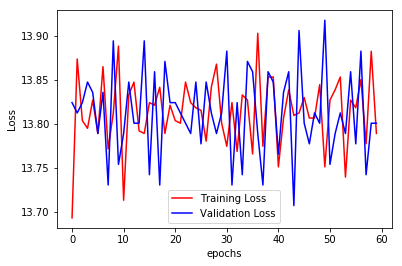

In [31]:
plt.plot(Adagrad_epochs, Adagrad_loss, 'red', label='Training Loss')
plt.plot(Adagrad_epochs, Adagrad_val_loss, 'blue', label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Model preperation for Adadelta

In [32]:
#model initializing
model = Sequential()

#adding conv2d and maxpool2d layers
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(dim1, dim2, 3)))
model.add(MaxPool2D(pool_size=(2,2)))

#2nd layer addition
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

In [33]:
#hidden layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.4))

model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.3))

model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.2))

#output
model.add(Dense(8, activation='softmax'))

In [34]:
#model compilation - Adadelta
model.compile(optimizer='Adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
#epochSize edited
epochSize = 30

Adadelta_history = model.fit_generator(
        train_generator,
        steps_per_epoch=(5522 / batchSize),
        epochs=epochSize,
        validation_data=validation_generator,
        validation_steps=(1377 / batchSize))

Epoch 1/30
111/110 [==============================] - 93s 836ms/step - loss: 1.8100 - acc: 0.3185 - val_loss: 1.1904 - val_acc: 0.6144
Epoch 2/30
111/110 [==============================] - 84s 761ms/step - loss: 0.9589 - acc: 0.6637 - val_loss: 0.9814 - val_acc: 0.6115
Epoch 3/30
111/110 [==============================] - 85s 767ms/step - loss: 0.5906 - acc: 0.7847 - val_loss: 0.8425 - val_acc: 0.7117
Epoch 4/30
111/110 [==============================] - 84s 761ms/step - loss: 0.4721 - acc: 0.8285 - val_loss: 0.4160 - val_acc: 0.8373
Epoch 5/30
111/110 [==============================] - 85s 765ms/step - loss: 0.4098 - acc: 0.8457 - val_loss: 0.4283 - val_acc: 0.8301
Epoch 6/30
111/110 [==============================] - 85s 763ms/step - loss: 0.3669 - acc: 0.8646 - val_loss: 0.3535 - val_acc: 0.8729
Epoch 7/30
111/110 [==============================] - 85s 766ms/step - loss: 0.3360 - acc: 0.8729 - val_loss: 0.4423 - val_acc: 0.8519
Epoch 8/30
111/110 [==============================] - 8

In [36]:
Adadelta_history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [37]:
Adadelta_loss = Adadelta_history.history['loss']
Adadelta_val_loss = Adadelta_history.history['val_loss']
Adadelta_acc = Adadelta_history.history['acc']
Adadelta_val_acc = Adadelta_history.history['val_acc']
Adadelta_epochs = range(len(Adadelta_acc))

## Visualizing

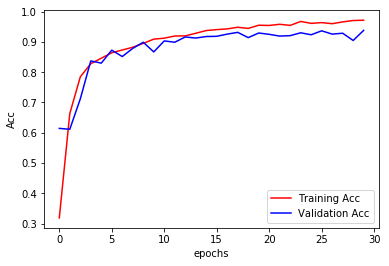

In [38]:
plt.plot(Adadelta_epochs, Adadelta_acc, 'red', label='Training Acc')
plt.plot(Adadelta_epochs, Adadelta_val_acc, 'blue', label='Validation Acc')
plt.xlabel('epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

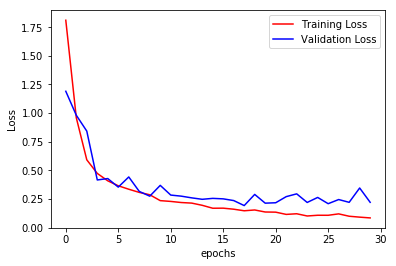

In [39]:
plt.plot(Adadelta_epochs, Adadelta_loss, 'red', label='Training Loss')
plt.plot(Adadelta_epochs, Adadelta_val_loss, 'blue', label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Model preperation for Adamax

In [40]:
#model initializing
model = Sequential()

#adding conv2d and maxpool2d layers
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(dim1, dim2, 3)))
model.add(MaxPool2D(pool_size=(2,2)))

#2nd layer addition
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

In [41]:
#hidden layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.4))

model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.3))

model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.2))

#output
model.add(Dense(8, activation='softmax'))

In [42]:
#model compilation - Adamax
model.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
Adamax_history = model.fit_generator(
        train_generator,
        steps_per_epoch=(5522 / batchSize),
        epochs=epochSize,
        validation_data=validation_generator,
        validation_steps=(1377 / batchSize))

Epoch 1/30
111/110 [==============================] - 93s 834ms/step - loss: 1.5000 - acc: 0.4779 - val_loss: 0.7960 - val_acc: 0.7052
Epoch 2/30
111/110 [==============================] - 84s 760ms/step - loss: 0.6150 - acc: 0.7752 - val_loss: 0.5974 - val_acc: 0.7894
Epoch 3/30
111/110 [==============================] - 84s 760ms/step - loss: 0.4711 - acc: 0.8200 - val_loss: 0.5404 - val_acc: 0.8097
Epoch 4/30
111/110 [==============================] - 84s 758ms/step - loss: 0.3913 - acc: 0.8477 - val_loss: 0.3746 - val_acc: 0.8577
Epoch 5/30
111/110 [==============================] - 85s 762ms/step - loss: 0.3295 - acc: 0.8695 - val_loss: 0.3278 - val_acc: 0.8853
Epoch 6/30
111/110 [==============================] - 84s 757ms/step - loss: 0.3114 - acc: 0.8782 - val_loss: 0.4094 - val_acc: 0.8664
Epoch 7/30
111/110 [==============================] - 84s 756ms/step - loss: 0.2850 - acc: 0.8932 - val_loss: 0.3091 - val_acc: 0.8925
Epoch 8/30
111/110 [==============================] - 8

In [44]:
Adamax_history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [45]:
Adamax_loss = Adamax_history.history['loss']
Adamax_val_loss = Adamax_history.history['val_loss']
Adamax_acc = Adamax_history.history['acc']
Adamax_val_acc = Adamax_history.history['val_acc']
Adamax_epochs = range(len(Adamax_acc))

## Visualizing

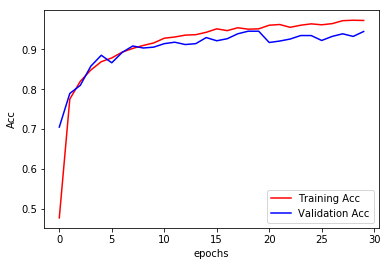

In [46]:
plt.plot(Adamax_epochs, Adamax_acc, 'red', label='Training Acc')
plt.plot(Adamax_epochs, Adamax_val_acc, 'blue', label='Validation Acc')
plt.xlabel('epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

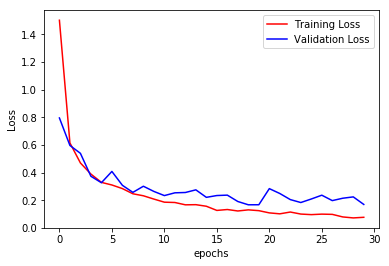

In [47]:
plt.plot(Adamax_epochs, Adamax_loss, 'red', label='Training Loss')
plt.plot(Adamax_epochs, Adamax_val_loss, 'blue', label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Model preperation for Nadam

In [48]:
#model initializing
model = Sequential()

#adding conv2d and maxpool2d layers
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(dim1, dim2, 3)))
model.add(MaxPool2D(pool_size=(2,2)))

#2nd layer addition
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

In [49]:
#hidden layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.4))

model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.3))

model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.2))

#output
model.add(Dense(8, activation='softmax'))

In [50]:
#model compilation - Nadam
model.compile(optimizer='Nadam', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
Nadam_history = model.fit_generator(
        train_generator,
        steps_per_epoch=(5522 / batchSize),
        epochs=epochSize,
        validation_data=validation_generator,
        validation_steps=(1377 / batchSize))

Epoch 1/30
111/110 [==============================] - 93s 840ms/step - loss: 2.0312 - acc: 0.3260 - val_loss: 1.7757 - val_acc: 0.4459
Epoch 2/30
111/110 [==============================] - 86s 772ms/step - loss: 1.3049 - acc: 0.5545 - val_loss: 0.8245 - val_acc: 0.7124
Epoch 3/30
111/110 [==============================] - 85s 768ms/step - loss: 0.8390 - acc: 0.6945 - val_loss: 0.6714 - val_acc: 0.7778
Epoch 4/30
111/110 [==============================] - 85s 765ms/step - loss: 0.6113 - acc: 0.7774 - val_loss: 0.5293 - val_acc: 0.8061
Epoch 5/30
111/110 [==============================] - 85s 765ms/step - loss: 0.5673 - acc: 0.7959 - val_loss: 0.6892 - val_acc: 0.7393
Epoch 6/30
111/110 [==============================] - 86s 774ms/step - loss: 0.5245 - acc: 0.8090 - val_loss: 0.5358 - val_acc: 0.8257
Epoch 7/30
111/110 [==============================] - 85s 766ms/step - loss: 0.3940 - acc: 0.8513 - val_loss: 0.3647 - val_acc: 0.8656
Epoch 8/30
111/110 [==============================] - 8

In [52]:
Nadam_history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [53]:
Nadam_loss = Nadam_history.history['loss']
Nadam_val_loss = Nadam_history.history['val_loss']
Nadam_acc = Nadam_history.history['acc']
Nadam_val_acc = Nadam_history.history['val_acc']
Nadam_epochs = range(len(Nadam_acc))

## Visualizing

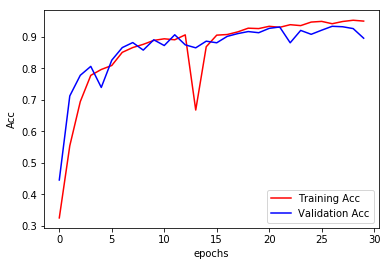

In [54]:
plt.plot(Nadam_epochs, Nadam_acc, 'red', label='Training Acc')
plt.plot(Nadam_epochs, Nadam_val_acc, 'blue', label='Validation Acc')
plt.xlabel('epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

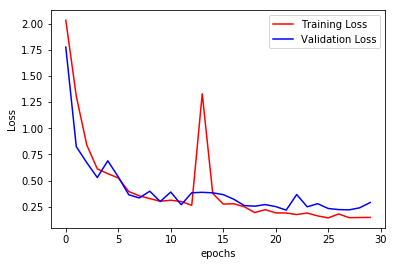

In [55]:
plt.plot(Nadam_epochs, Nadam_loss, 'red', label='Training Loss')
plt.plot(Nadam_epochs, Nadam_val_loss, 'blue', label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# END-OF-CODE